In [76]:
import numpy as np
import pandas as pd
from PIL import Image
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version:', mpl.__version__)

!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

!pip install wget
%conda install wget

!pip install folium
import folium

print('folium installed and imported!')

Matplotlib version: 3.3.4
Wordcloud is installed and imported!
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
folium installed and imported!


In [77]:
df_lcd=pd.read_csv('/Users/ahmadiskandar/Documents/Documents - Ahmad’s iMac/OneDrive - PT Sarana Multi Infrastruktur/H8 066/Dataset_Tugas/london_crime_by_lsoa.csv')
df_lcd

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [78]:
df_lcd.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [79]:
pivotlcd = pd.pivot_table(df_lcd, values='value', index=['borough'],
                    columns=['year'], aggfunc=np.sum)
pivotlcd.columns = list(map(str, pivotlcd.columns))
pivotlcd

,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
City of London,0,0,0,69,157,110,115,151,178
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127


In [80]:
pivotlcd['Total']=pivotlcd.sum(axis=1)
pivotlcd

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
City of London,0,0,0,69,157,110,115,151,178,780
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562


In [81]:
years = list(map(str, range(2008,2017)))
years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

# Line Chart

## Question : How do the sum of crimes in each year vary by month?

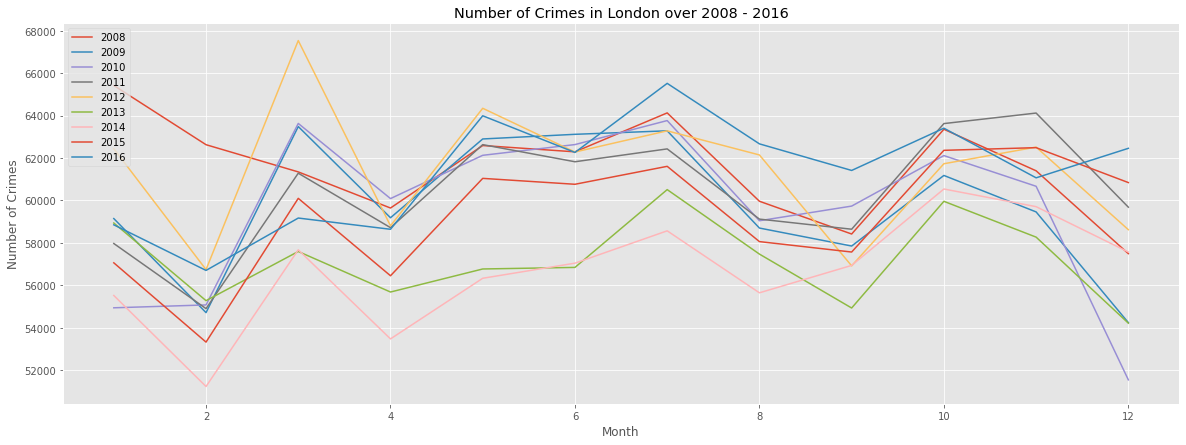

In [82]:
pivotlcd_time = pd.pivot_table(df_lcd, values='value', index=['year'],
                    columns=['month'], aggfunc=np.sum)

pivotlcd_time.transpose().plot(kind='line', figsize = (20,7))

plt.title('Number of Crimes in London over 2008 - 2016')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(loc='upper left')

plt.show()

## Analysis: the crime tends to increase in March, May, July, and October

## Question : What are top 5 boroughs that contribute to total crime in London over 2008 - 2016?

/Users/ahmadiskandar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


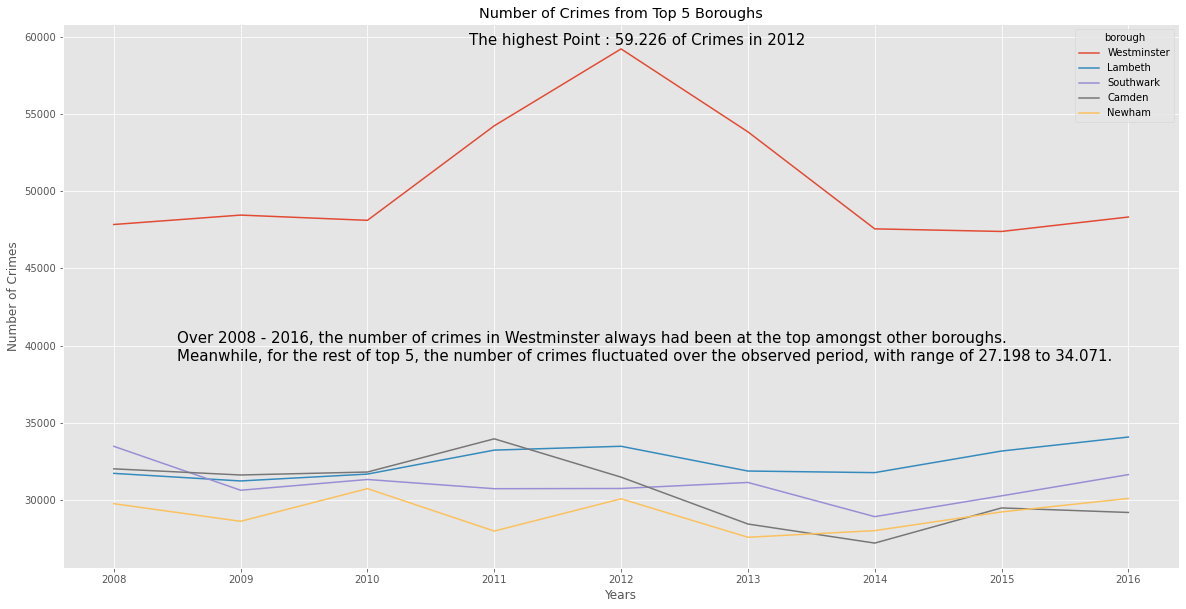

In [83]:
pivotlcd.sort_values(by='Total', ascending=False, ax is=0, inplace=True)

pivotlcd_top5 = pivotlcd.head(5)
pivotlcd_top5.drop(['Total'], axis=1, inplace=True)
pivotlcd_top5_transpose= pivotlcd_top5.transpose()

pivotlcd_top5_transpose.plot(kind='line', figsize=(20,10))

plt.title('Number of Crimes from Top 5 Boroughs')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')


plt.annotate('The highest Point : 59.226 of Crimes in 2012', # s: str will leave it blank for no text
             xy=(2.8,59300), 
             rotation=0, 
            va='bottom', 
            ha='left',
             size = 15
            )


plt.annotate('Over 2008 - 2016, the number of crimes in Westminster always had been at the top amongst other boroughs.', # s: str will leave it blank for no text
             xy=(0.5,40000), 
             rotation=0, 
            va='bottom', 
            ha='left', 
             size = 15
            )
plt.annotate('Meanwhile, for the rest of top 5, the number of crimes fluctuated over the observed period, with range of 27.198 to 34.071.', # s: str will leave it blank for no text
             xy=(0.5,38800), 
             rotation=0, 
            va='bottom', 
            ha='left',
             size = 15
            )
plt.show()

In [84]:
pivotlcd_top5_transpose.describe()

borough,Westminster,Lambeth,Southwark,Camden,Newham
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,50558.666667,32464.222222,30978.777778,30571.888889,29113.777778
std,4201.683918,1014.515005,1215.293049,2121.547633,1119.162385
min,47395.000000,31225.000000,28912.000000,27198.000000,27577.000000
25%,47846.000000,31717.000000,30623.000000,29183.000000,28005.000000
50%,48330.000000,31868.000000,30737.000000,31472.000000,29217.000000
75%,53852.000000,33224.000000,31320.000000,31804.000000,30067.000000
max,59226.000000,34071.000000,33470.000000,33956.000000,30728.000000


# Histogram Chart

## Question : How is the distribution of boroughs for years of 2008, 2012, and 2016?

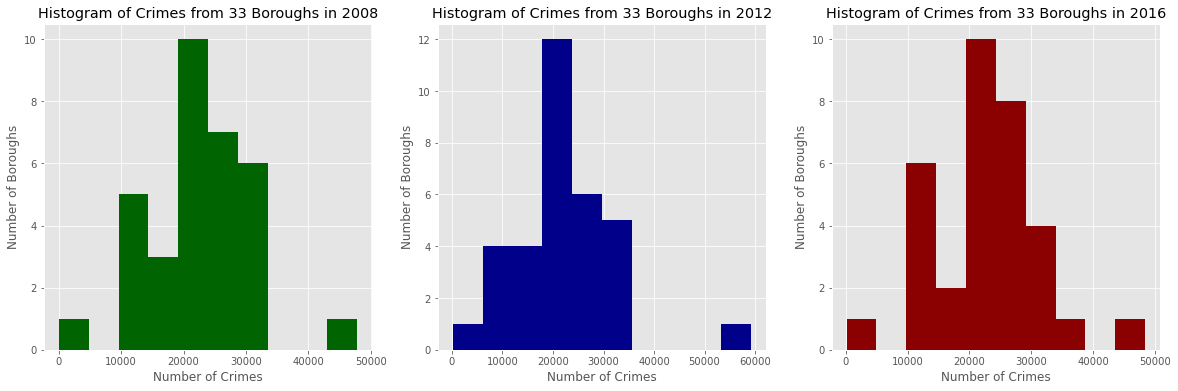

In [85]:
fig = plt.figure() # create figure

#ax = fig.add_subplot(nrows, ncols, plot_number) # create supblot

ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)


# Subplot 1 : Histogram

pivotlcd['2008'].plot(kind='hist', color='darkgreen', ax=ax0, figsize=(20,6))
ax0.set_title('Histogram of Crimes from 33 Boroughs in 2008')
ax0.set_ylabel('Number of Boroughs')
ax0.set_xlabel('Number of Crimes')


# Subplot 2 : Histogram

pivotlcd['2012'].plot(kind='hist', color='darkblue', ax=ax1, figsize=(20,6))

ax1.set_title('Histogram of Crimes from 33 Boroughs in 2012')
ax1.set_ylabel('Number of Boroughs')
ax1.set_xlabel('Number of Crimes')


# Subplot 3 : Histogram

pivotlcd['2016'].plot(kind='hist', color='darkred', ax=ax2, figsize=(20,6))

ax2.set_title('Histogram of Crimes from 33 Boroughs in 2016')
ax2.set_ylabel('Number of Boroughs')
ax2.set_xlabel('Number of Crimes')

plt.show()

### By comparing three years (2008, 2012, 2016) in which total number of crimes exceeded 730 thousand, we can see that in 2012, there were 12 boroughs that contributed to the total crimes. In 2008 and 2016, there were only 10 boroughs. Antoher interesting poin from those three graphs is that there is always one borough that had crimes above others.

In [86]:
print(pivotlcd['2008'].max())
print(pivotlcd['2012'].max())
print(pivotlcd['2016'].max())

47846
59226
48330


# Bar Chart

## Question: compare the number of crimes in Westminster and City of London from 2008-2016

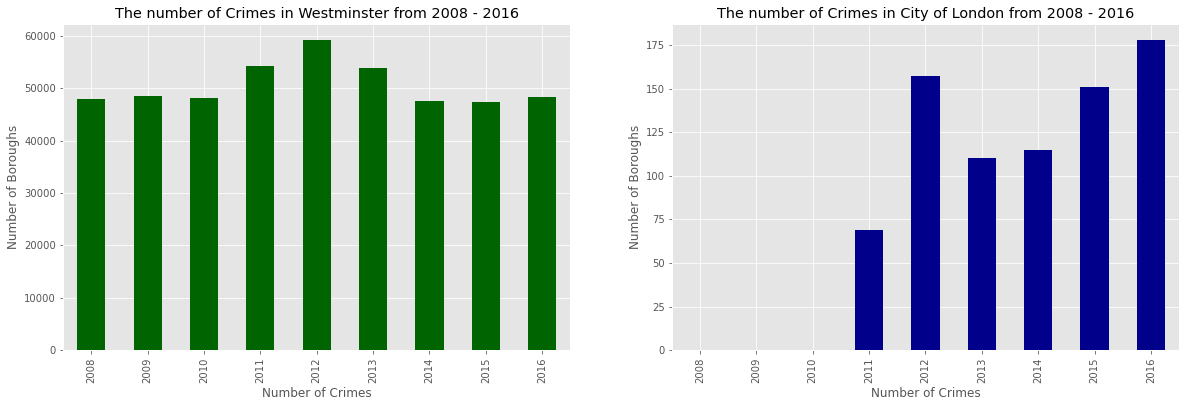

In [87]:
lcd_westminster = pivotlcd.loc['Westminster', years]
lcd_london = pivotlcd.loc['City of London', years]


fig = plt.figure() # create figure


ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


# Subplot 1 : Bar chart

lcd_westminster.plot(kind='bar', color='darkgreen', ax=ax0, figsize=(20,6))
ax0.set_title('The number of Crimes in Westminster from 2008 - 2016')
ax0.set_ylabel('Number of Boroughs')
ax0.set_xlabel('Number of Crimes')


# Subplot 2 : Bar chart

lcd_london.plot(kind='bar', color='darkblue', ax=ax1, figsize=(20,6))

ax1.set_title('The number of Crimes in City of London from 2008 - 2016')
ax1.set_ylabel('Number of Boroughs')
ax1.set_xlabel('Number of Crimes')



plt.show()

### Analysis:

### as shown in graph above, the number of crimes in Westminster never fall below 47.395 over the observation period. While, the City of London experienced increasing trend of crime.

# Pie Chart

## Question: what are the crime category occurred in London during 2008 - 2016?

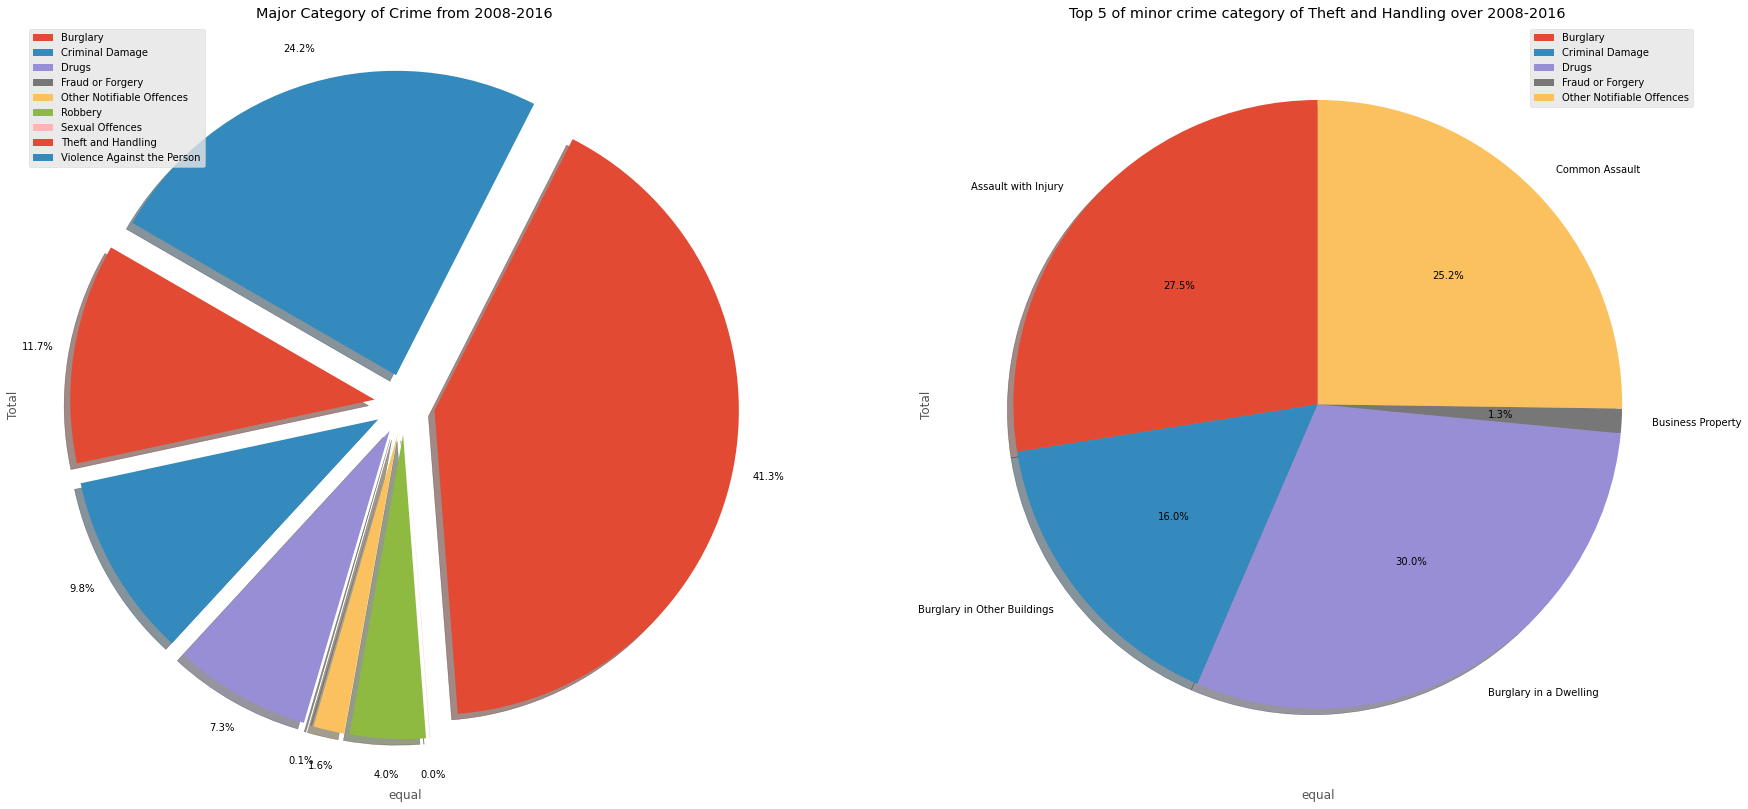

In [88]:
pivot_majorcat = pd.pivot_table(df_lcd, values='value', index=['major_category'],
                    columns=['year'], aggfunc=np.sum)
pivot_majorcat['Total']=pivot_majorcat.sum(axis=1)
condition1 = df_lcd['major_category'] == 'Theft and Handling'
majcat_theft=df_lcd[condition1]
pivot_majcat_theft = pd.pivot_table(df_lcd, values='value', index=['minor_category'],
                    columns=['year'], aggfunc=np.sum)
pivot_majcat_theft['Total']=pivot_majcat_theft.sum(axis=1)
pivot_majcat_theft5=pivot_majcat_theft.head(5)



fig = plt.figure() # create figure


ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


# Subplot 1 : pie chart

explode_list = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1] # ratio for each continent with with to offset each wedge

pivot_majorcat['Total'].plot(kind='pie',
                      figsize=(30,15),
                       autopct='%1.1f%%', # add in percentages
                       startangle=150,
                       shadow=True,
                       labels=None,
                       pctdistance=1.12,
                             ax=ax0,
                       explode=explode_list
                      )


ax0.legend(labels=pivot_majorcat.index, loc='upper left')
ax0.set_title('Major Category of Crime from 2008-2016')
ax0.set_xlabel('equal')


# Subplot 2 : pie chart

pivot_majcat_theft5['Total'].plot(kind='pie',
                      figsize=(30,15),
                       autopct='%1.1f%%', # add in percentages
                       startangle=90,
                                  ax=ax1,
                       shadow=True
                      )

ax1.set_title('Top 5 of minor crime category of Theft and Handling over 2008-2016')
ax1.set_xlabel('equal')
ax1.legend(labels=pivot_majorcat.index, loc='upper right')


plt.show()

### Analysis : Theft and Handling is the most frequent crime in London over the period. it contributes 41,3% of total crime. If we breakdow that type of crime, burglary in a dwelling, assault with injury, and commot assult are the most common.

# Box Plot

## Question : Is Westminster an outlier?

In [89]:
pivotlcd

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092,230286
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613


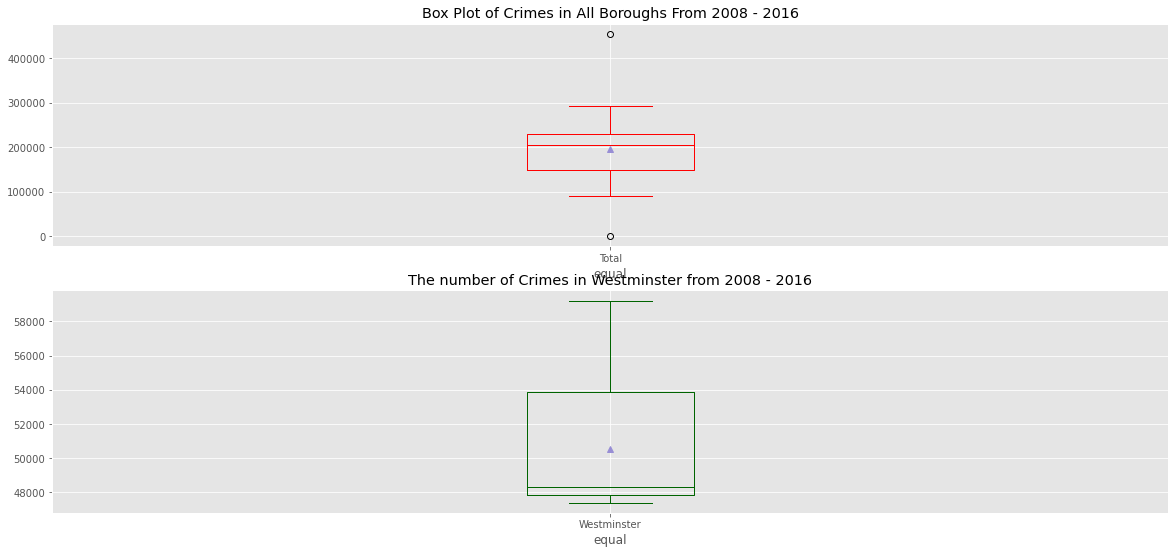

count        33.000000
mean     195386.606061
std       79148.057551
min         780.000000
25%      149447.000000
50%      203879.000000
75%      228613.000000
max      455028.000000
Name: Total, dtype: float64

count        9.000000
mean     50558.666667
std       4201.683918
min      47395.000000
25%      47846.000000
50%      48330.000000
75%      53852.000000
max      59226.000000
Name: Westminster, dtype: float64


In [90]:
fig = plt.figure()


ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2)



# Subplot 1 : Box Plot

pivotlcd['Total'].plot(kind='box', color='red', showmeans=True, ax=ax0, figsize=(20,9))

ax0.set_title('Box Plot of Crimes in All Boroughs From 2008 - 2016')
ax0.set_xlabel('equal')


# Subplot 2 : Box Plot

lcd_westminster.plot(kind='box', color='darkgreen', showmeans=True, ax=ax1, figsize=(20,9))
ax1.set_title('The number of Crimes in Westminster from 2008 - 2016')
ax1.set_xlabel('equal')

plt.show()

print(pivotlcd['Total'].describe())
print('')
print(lcd_westminster.describe())

In [91]:
# Perhitungan batas outliers adalah
    # larger than Q3 by at least 1.5 times the interquantile range (IQR)
    # smaller than Q1 by at least 1.5 times IQR
    # IQR = Q3-Q1
Q3 = 228613
Q1 = 149447
rangetotal = Q3-Q1
Westminster = 455028

if Westminster > (1.5*rangetotal):
    print('Westminster is an outlier')
else:
    print('Westminster is not an outlier')

Westminster is an outlier


# Scatter Plot

## Question : Plot the total number of crimes over 2008 to 2016

In [92]:
pivotlcd_transpose = pivotlcd.transpose()
pivotlcd_transpose.drop(['Total'], axis=0, inplace=True)
pivotlcd_transpose

borough,Westminster,Lambeth,Southwark,Camden,Newham,Croydon,Ealing,Islington,Tower Hamlets,Brent,...,Kensington and Chelsea,Barking and Dagenham,Havering,Harrow,Merton,Bexley,Sutton,Richmond upon Thames,Kingston upon Thames,City of London
2008,47846,31717,33470,32010,29752,29516,28947,26273,23578,23504,...,20663,17656,15395,13774,13875,15305,12943,11106,10661,0
2009,48456,31225,30623,31612,28610,29784,28617,25485,21959,24748,...,18742,17713,14538,13948,13561,14445,12240,10618,10163,0
2010,48116,31671,31320,31804,30728,29373,31360,24693,23072,25512,...,19481,17130,14957,13945,13595,13166,12032,10601,10171,0
2011,54243,33224,30723,33956,27978,29830,29537,24980,24712,27669,...,19146,16686,15496,12801,13548,11325,11068,10896,10155,69
2012,59226,33473,30737,31472,30067,30189,28832,26268,26784,26357,...,19757,15990,15965,12803,12856,11669,10948,11168,9956,157
2013,53852,31868,31128,28435,27577,27444,25917,23784,26258,23759,...,17702,15759,15089,11914,11595,11552,10057,10439,9191,110
2014,47564,31765,28912,27198,28005,27357,24978,24679,25504,24426,...,17840,15426,14734,11909,11596,11844,10443,10456,9288,115
2015,47395,33164,30260,29477,29217,28089,26247,27032,27493,24883,...,19070,16346,15870,12601,12273,11990,10598,10413,9738,151
2016,48330,34071,31636,29183,30090,28712,27127,27092,29253,26693,...,19580,16741,16903,13153,12755,12840,10658,11074,9983,178


In [93]:
pivotlcd_transpose['Total'] = pivotlcd_transpose.sum(axis=1)
pivotlcd_transpose_total = pd.DataFrame(pivotlcd_transpose['Total'])
pivotlcd_transpose_total.reset_index(inplace=True)
pivotlcd_transpose_total.columns = ['year', 'total']
pivotlcd_transpose_total

,year,total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


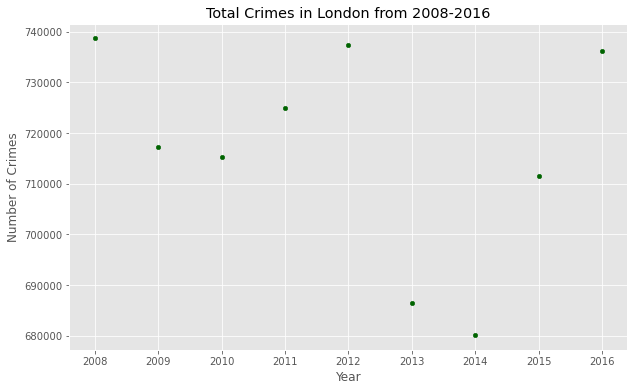

In [94]:
pivotlcd_transpose_total.plot(kind='scatter',
                              x='year', 
                              y='total', 
                              figsize=(10,6), 
                              color='darkgreen')

plt.title('Total Crimes in London from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.show()

# Overall Conclusion 1 : Westminster is the center of crime in London with the Theft and Handling is the most common crime occurred during 2008 - 2016


# Overall Conclusion 2 : Number of crimes tend to increase in March, May, July, and October

# Word Clouds

In [95]:
stopwords = set(STOPWORDS)

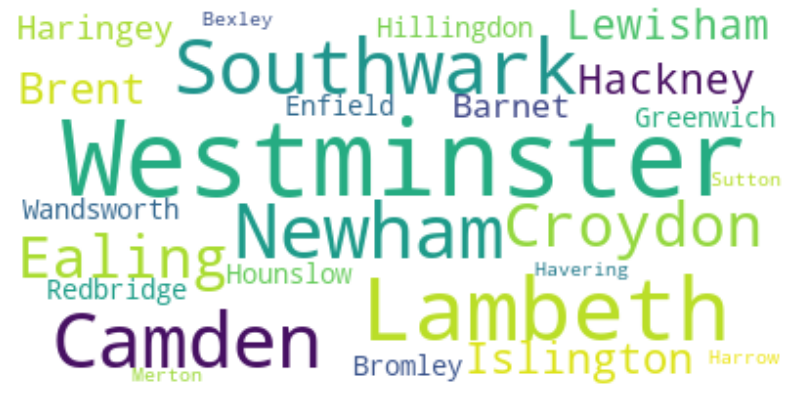

In [96]:
totalcrime = pivotlcd['Total'].sum()

max_words = 90
word_string = ''
for borough in pivotlcd.index.values:
    if len(borough.split(' ')) ==1:
        repeat_num_times = int(pivotlcd.loc[borough, 'Total']/float(totalcrime)*max_words)
        word_string=word_string+((borough+' ')*repeat_num_times)

wordcloud = WordCloud(background_color='white').generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Folium Maps

In [97]:
world_map = folium.Map(location=[51.506949, -0.122876], zoom_start=12)

world_map